In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import wavio
import IPython

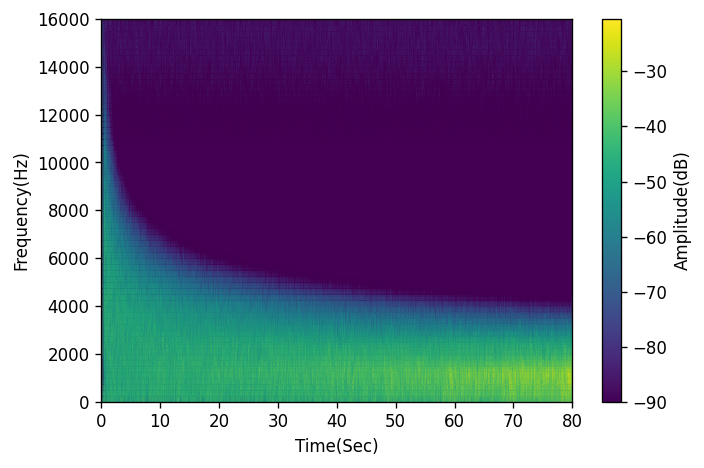

In [2]:
sr = 32000

wav = wavio.read("LAVA-VERB.wav")

left_channel = wav.data[:, 0]
left_channel = left_channel.astype(np.float32, order='C') / 32767.0
left_channel = left_channel * 4

f, t, Wxx = signal.stft(left_channel, sr, nperseg = 128)

x = t
y = f
Z = 20 * np.log10(np.abs(Wxx))
z_max = Z.max()

fig, ax = plt.subplots(figsize=(6, 4), dpi = 120)
ax.set_xlabel("Time(Sec)")
ax.set_ylabel("Frequency(Hz)")
c = ax.pcolormesh(x, y, Z, shading='gouraud', vmin = -90, vmax = z_max)
plt.colorbar(c, label="Amplitude(dB)")

fig.tight_layout()
plt.show()

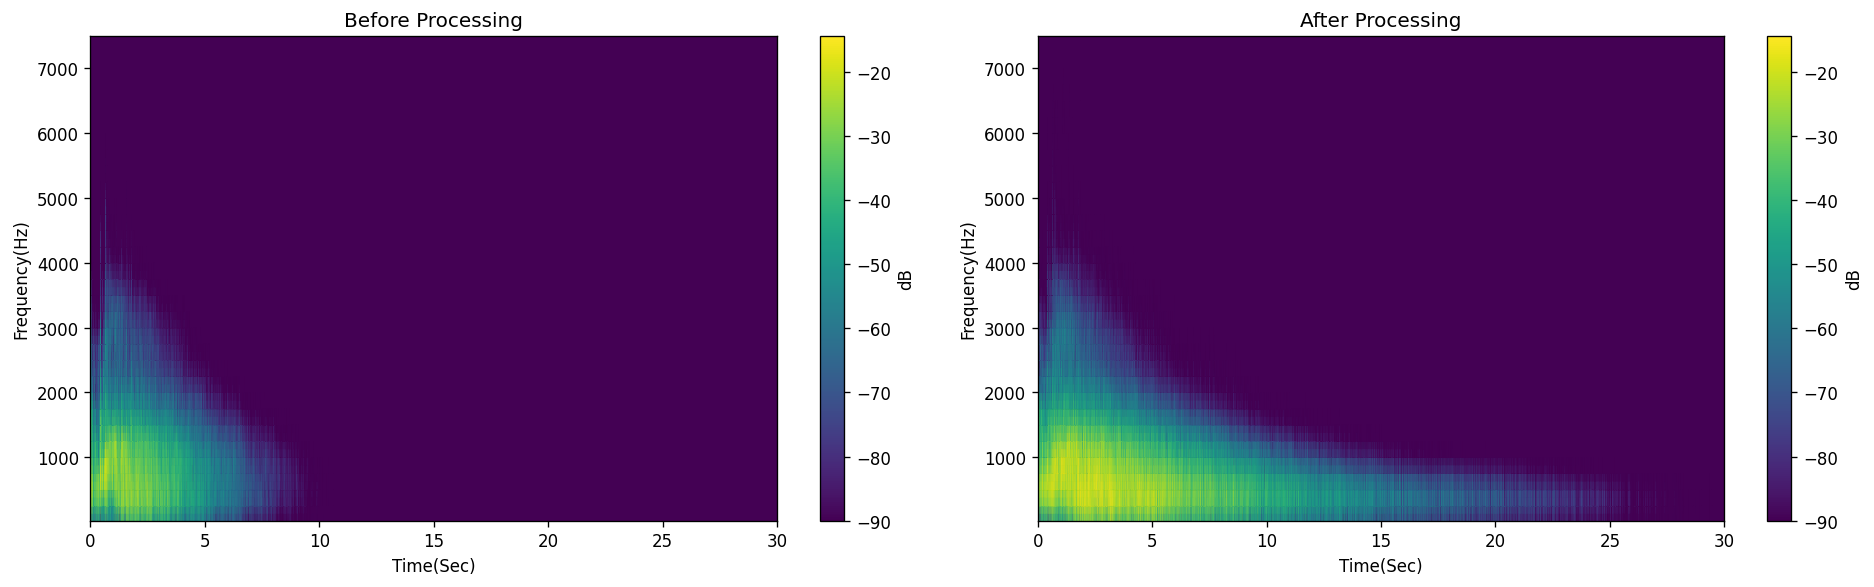

In [3]:
sr = 32000

wav = wavio.read("A Hornet Pillow.wav")
original = wav.data[:, 0]
original = original.astype(np.float32, order='C') / 32767.0

wav = wavio.read("A Hornet Pillow_render.wav")
render = wav.data[:, 0]
render = render.astype(np.float32, order='C') / 32767.0
render = render * 2

f0, t0, Wxx0 = signal.stft(original, sr, nperseg = 128)
f1, t1, Wxx1 = signal.stft(render, sr, nperseg = 128)

Z0 = 20 * np.log10(np.abs(Wxx0))
Z1 = 20 * np.log10(np.abs(Wxx1))

z_max = Z0.max()

fig, ax = plt.subplots(1, 2, figsize=(16, 5), dpi = 120)

ax[0].set_ylim(20, 7500)
ax[0].set_xlabel("Time(Sec)")
ax[0].set_ylabel("Frequency(Hz)")

ax[1].set_ylim(20, 7500)
ax[1].set_xlabel("Time(Sec)")
ax[1].set_ylabel("Frequency(Hz)")

c = ax[0].pcolormesh(t0, f0, Z0, shading='gouraud', vmin=-90, vmax=z_max)
fig.colorbar(c, ax=ax[0], label="dB")
ax[0].set_title("Before Processing")

c = ax[1].pcolormesh(t1, f1, Z1, shading='gouraud', vmin=-90, vmax=z_max)
fig.colorbar(c, ax=ax[1], label="dB")
ax[1].set_title("After Processing")

fig.tight_layout()
plt.show()

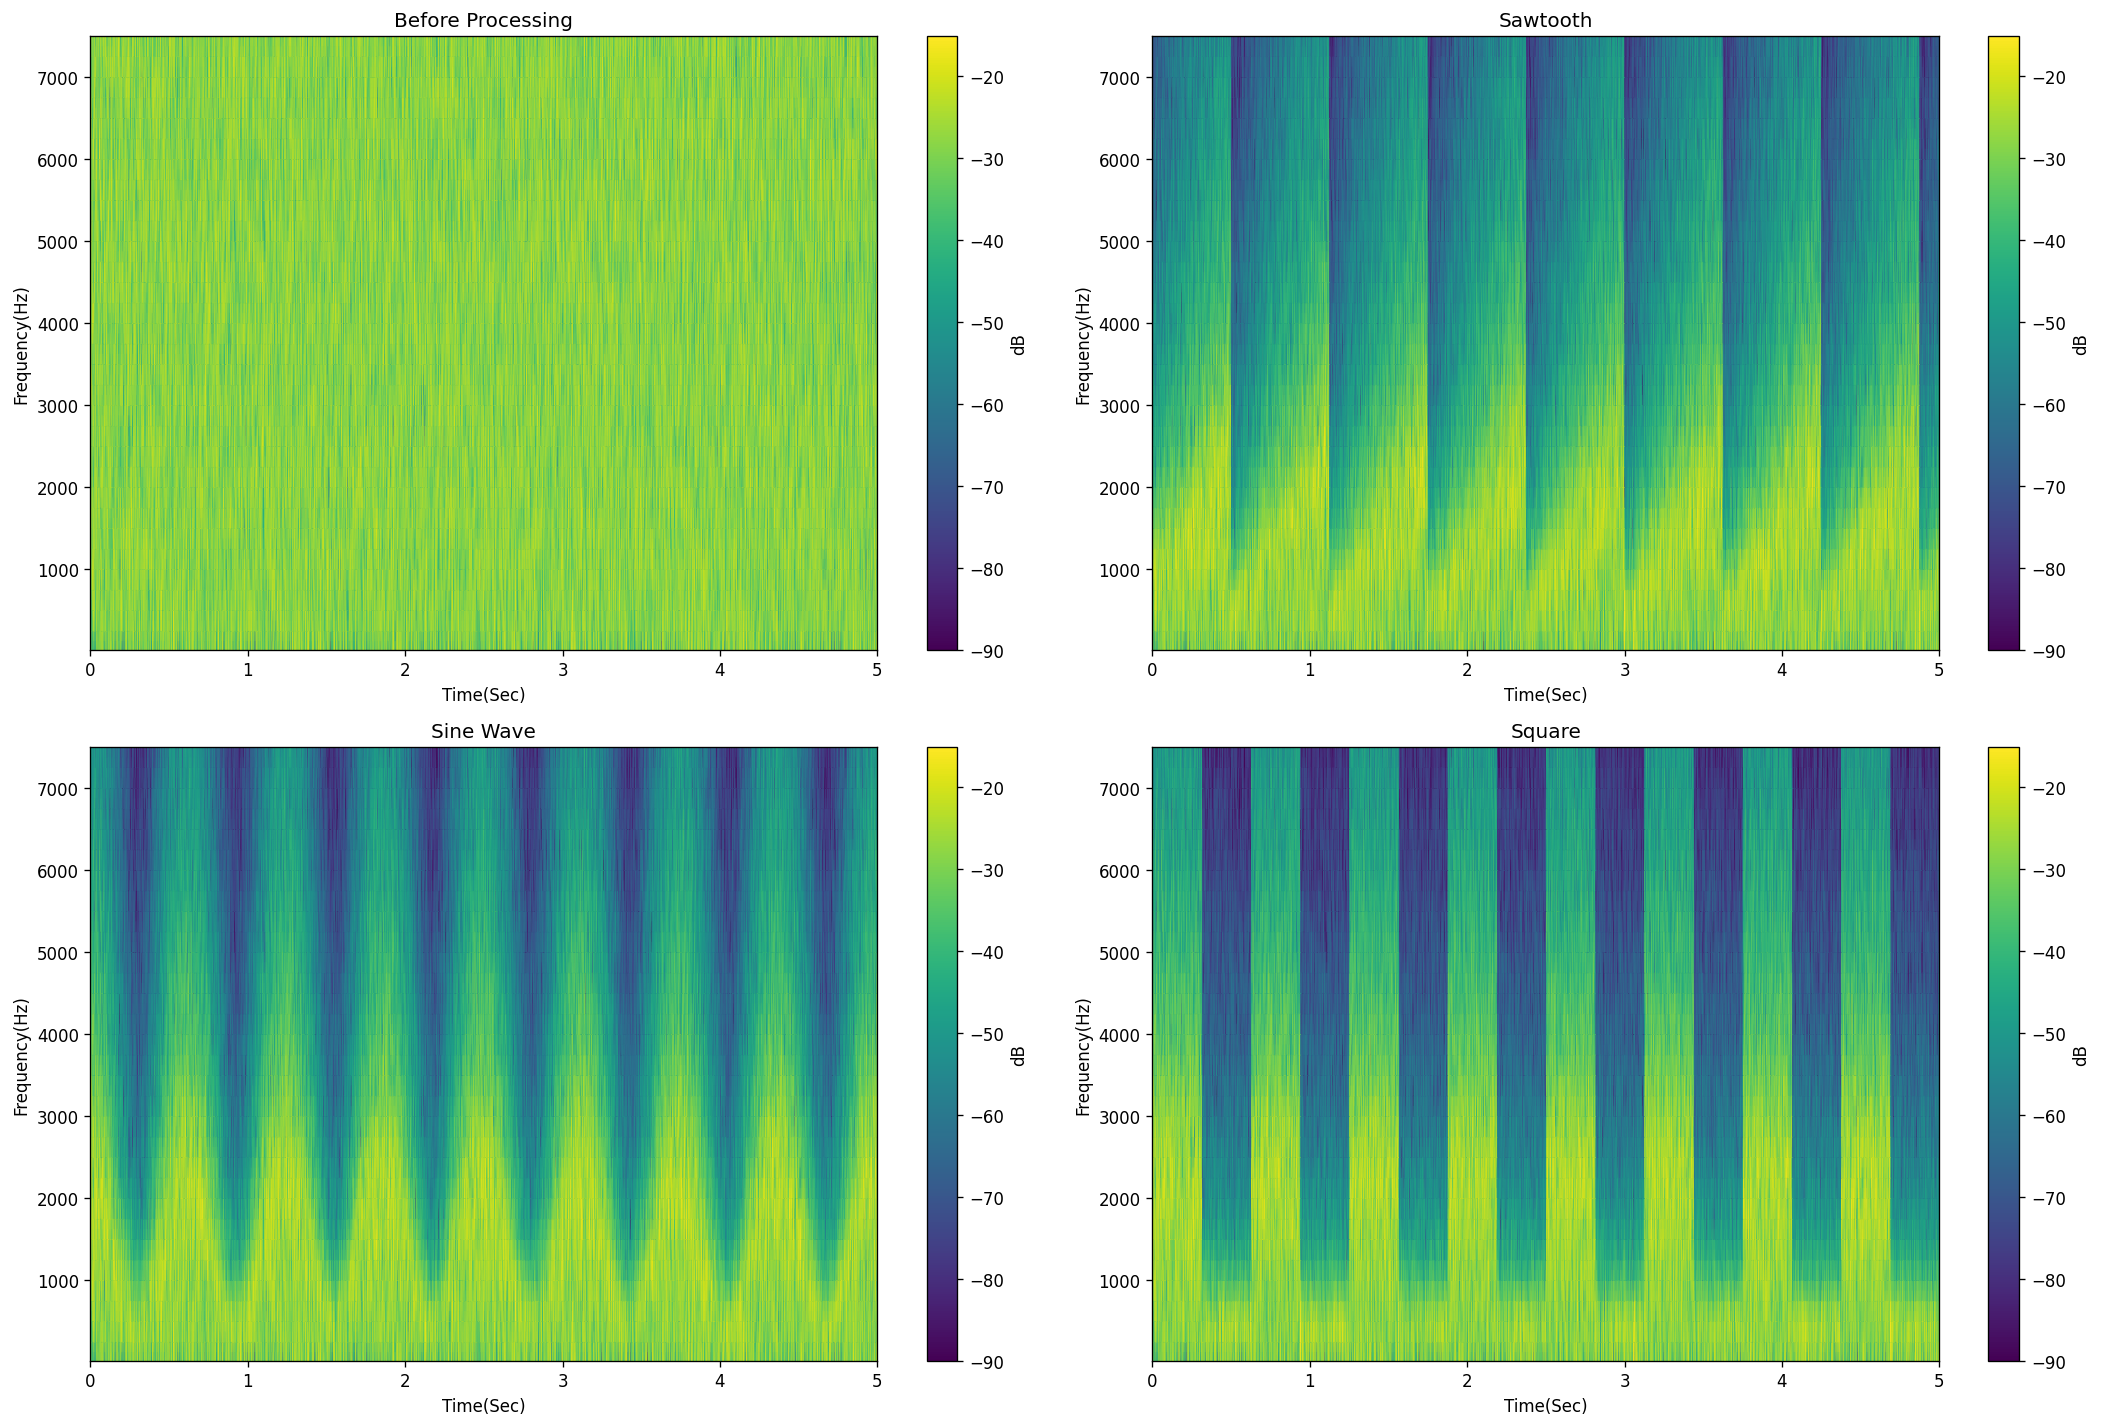

In [4]:
sr = 32000

wav = wavio.read("noise.wav")
original = wav.data[:, 0]
original = original.astype(np.float32, order='C') / 32767.0
original = original[:int(7.5 * sr)]

wav = wavio.read("sine.wav")
sine = wav.data[:, 0]
sine = sine.astype(np.float32, order='C') / 32767.0

wav = wavio.read("sawtooth.wav")
sawtooth = wav.data[:, 0]
sawtooth = sawtooth.astype(np.float32, order='C') / 32767.0

wav = wavio.read("square.wav")
square = wav.data[:, 0]
square = square.astype(np.float32, order='C') / 32767.0

f0, t0, Wxx0 = signal.stft(original, sr, nperseg = 128)
f1, t1, Wxx1 = signal.stft(sine, sr, nperseg = 128)
f2, t2, Wxx2 = signal.stft(sawtooth, sr, nperseg = 128)
f3, t3, Wxx3 = signal.stft(square, sr, nperseg = 128)

Z0 = 20 * np.log10(np.abs(Wxx0))
Z1 = 20 * np.log10(np.abs(Wxx1))
Z2 = 20 * np.log10(np.abs(Wxx2))
Z3 = 20 * np.log10(np.abs(Wxx3))


z_max = Z0.max()

fig, ax = plt.subplots(2, 2, figsize=(18, 12), dpi = 120)

ax[0][0].set_ylim(20, 7500)
ax[0][0].set_xlabel("Time(Sec)")
ax[0][0].set_ylabel("Frequency(Hz)")

ax[1][0].set_ylim(20, 7500)
ax[1][0].set_xlabel("Time(Sec)")
ax[1][0].set_ylabel("Frequency(Hz)")

ax[0][1].set_ylim(20, 7500)
ax[0][1].set_xlabel("Time(Sec)")
ax[0][1].set_ylabel("Frequency(Hz)")

ax[1][1].set_ylim(20, 7500)
ax[1][1].set_xlabel("Time(Sec)")
ax[1][1].set_ylabel("Frequency(Hz)")

c = ax[0][0].pcolormesh(t0, f0, Z0, shading='gouraud', vmin=-90, vmax=z_max)
fig.colorbar(c, ax=ax[0][0], label="dB")
ax[0][0].set_title("Before Processing")

c = ax[1][0].pcolormesh(t1, f1, Z1, shading='gouraud', vmin=-90, vmax=z_max)
fig.colorbar(c, ax=ax[1][0], label="dB")
ax[1][0].set_title("Sine Wave")

c = ax[0][1].pcolormesh(t2, f2, Z2, shading='gouraud', vmin=-90, vmax=z_max)
fig.colorbar(c, ax=ax[0][1], label="dB")
ax[0][1].set_title("Sawtooth")

c = ax[1][1].pcolormesh(t3, f3, Z3, shading='gouraud', vmin=-90, vmax=z_max)
fig.colorbar(c, ax=ax[1][1], label="dB")
ax[1][1].set_title("Square")

fig.tight_layout()
plt.show()

In [9]:
arr = [100, 100, 1000, 1200, 100, 125]

curr1 = 0
curr2 = 0

arr1 = list()
arr2 = list()

for i in range(len(arr)):
    if i == 0:
        res = arr[0]
    elif i == 1:
        res = max(arr[0], arr[1])
    else:
        res = max(arr[i] + curr2, curr1)
        
        if(arr[i] + curr2 > curr1):
            print("condition1")
            arr1.append(arr[i])
            arr2.append(arr[i-1]) 
        elif(arr[i] + curr2 < curr1):
            print("condition2")   
        else:
            print("condition3")
        
    curr2 = curr1
    curr1 = res
    print(res, arr1, arr2)    

100 [] []
100 [] []
condition1
1100 [1000] [100]
condition1
1300 [1000, 1200] [100, 1000]
condition2
1300 [1000, 1200] [100, 1000]
condition1
1425 [1000, 1200, 125] [100, 1000, 100]
